In [103]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys, os
opj = os.path.join
CODE_DIR = os.path.abspath('../..')
sys.path.append(opj(CODE_DIR, 'EPypes'))
sys.path.append(opj(CODE_DIR, 'FlexVi'))
sys.path.append(opj(CODE_DIR, 'kacomponents'))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
from matplotlib import pyplot as plt

In [105]:
from epypes import compgraph, node, pipeline

from flexvi.core.images import open_image
from flexvi.core.chessboard import find_chessboard_corners_on_image

In [106]:
def reformat_cbc(cbc_tuple):
    success, res = cbc_tuple
    if not success:
        raise Exception('Chessborard corners were not identified correctly')
    return res.reshape(-1, 2)

cb_G = compgraph.CompGraph(
    func_dict = {
        'open': open_image,
        'find_corners': find_chessboard_corners_on_image,
        'reformat_corners': reformat_cbc
    }, 
    func_io = {
        'open': (('im_fname', 'gray'), 'image'),
        'find_corners': (('image', 'pattern_size'), 'corners'),
        'reformat_corners': ('corners', 'corners_np')
    }
)

cb_runner = compgraph.CompGraphRunner(cb_G)

imfile = opj(CODE_DIR, 'DATA', 'IMG/calib/amct', 'cam0_image00013.tif')

cb_runner.freeze_token('im_fname', imfile)
cb_runner.freeze_token('pattern_size', (8, 5))
cb_runner.freeze_token('gray', True)

#cb_runner.run(im_fname=imfile)
cb_runner.run()

In [107]:
#cg_with_nodes = cb_G.to_cg_with_nodes()

frozen_vals = {
    #'im_fname': imfile,
    'pattern_size': (8, 5),
    'gray': True   
}

#runner_with_nodes = compgraph.CompGraphRunner(cg_with_nodes, frozen_vals)
#runner_with_nodes.run()
#runner_with_nodes.required_source_tokens

cb_pipe = pipeline.Pipeline('ChessboardDetector', cb_G, frozen_vals)
res = cb_pipe.run(im_fname=imfile, tokens_to_get=['image', 'corners_np'])

In [108]:
cb_pipe.traverse_time()

('ChessboardDetector',
 0.01609492301940918,
 (('reformat_corners', 7.867813110351562e-06),
  ('open', 0.0029668807983398438),
  ('find_corners', 0.012989997863769531)))

In [109]:
cb_runner.token_manager.frozen_values

{'gray': True,
 'im_fname': '/Users/alex/Dropbox/PhD/CODE/DATA/IMG/calib/amct/cam0_image00013.tif',
 'pattern_size': (8, 5)}

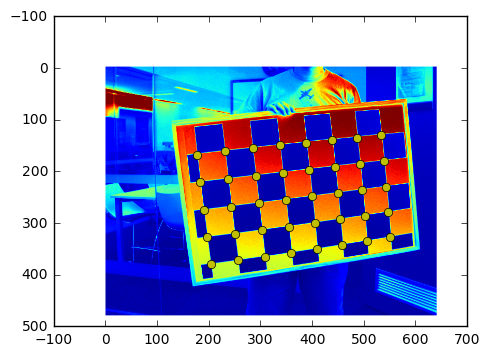

In [110]:
plt.figure()
plt.imshow(cb_runner.token_value('image'))

corners_np = cb_runner.token_value('corners_np')
cx = corners_np[:, 0]
cy = corners_np[:, 1]
plt.plot(cx, cy, 'yo')